# Home credit default risk

## Dataset description

The dataset `train.csv` contains the some **information about the loans**; the source is Kaggle https://www.kaggle.com/c/home-credit-default-risk.

Each record refers to a specific dossier, uniquely identified by the `ID` variable
The `TARGET` represents the payment performance and can assume the following values:

* 1 - customer with some difficulties in repaying his debt
* 0 - otherwise

The aim is to **build a model that can predict the payment performance for the next loan requests**, based on some **predictors**:

**Socio-demo info**
* `GENDER`/ `NAME_FAMILY_STATUS`/ `CNT_CHILDREN`/ `CNT_FAM_MEMBERS`: client's gender / family status of the client / number of children / number of family members
* `OCCUPATION_TYPE`/  `ORGANIZATION_TYPE`: what kind of occupation does the client have and employers origanization type
* `DAYS_AGE`: Client's age in days at the time of application
* `DAYS_EMPLOYMENT`: How many days before the application the person started its current employment
* `DAYS_ID_PUBLISH`: how many days before the application did client change the identity document
* `NAME_EDUCATION_TYPE`: level of highest education the client achieved
* `FLAG_PHONE`/ `FLAG_MOBIL`/ `FLAG_WORK_PHONE`/ `FLAG_EMP_PHONE`: if client provided home / mobile / work / employers * phones
* `FLAG_CONT_MOBLE`: was mobile phone reachable
* `FLAG_EMAIL`: Did client provide email
* `REG_REGION_NOT_LIVE_REGION`: Flag if client's permanent address does not match contact address
* `REG_REGION_NOT_WORK_REGION`: Flag if client's permanent address does not match work address
* `LIVE_REGION_NOT_WORK_REGION`: Flag if client's contact address does not match work address
* `REG_CITY_NOT_LIVE_CITY`: Flag if client's permanent address does not match contact address
* `REG_CITY_NOT_WORK_CITY`: Flag if client's permanent address does not match work address
* `LIVE_CITY_NOT_WORK_CITY`: Flag if client's contact address does not match work address

**Income info**
* `NAME_HOUSING_TYPE`:housing situation of the client (renting, living with parents, ...)
* `AMT_INCOME_TOTAL` and `NAME_INCOME_TYPE`: income of the client and clients income type (businessman, working, maternity leave, ...)
* `FLAG_OWN_CAR (OWN_CAR_AGE)` and `FLAG_OWN_REALTY`:respectively flag if client owns a car (and its age) or a house (flat)

**Behavioral info**
* `NAME_TYPE_SUITE:` who was accompanying client when he was applying for the loan
* `WEEKDAY_APPR_PROCESS_START` / `HOUR_APPR_PROCESS_START`: on which day of the week / hour did the client apply for the loan

**Residence info. The various _TAG suffixes correspond to the average (_AVG), modus (_MODE) and median (_MEDI)**
* `APARTMENTS_TAG`: apartments size
* `YEARS_BUILD_TAG`: age of buildings
* `ELEVATORS_TAG`: number of elevators
* `ENTRANCES_TAG`: number of entrances
* `FLOORSMIN_TAG` /  `FLOORSMAX_TAG`: number of floors
* `HOUSETYPE_MODE`: house type
* `TOTAL_AREA_MODE`: total area
* `WALLSMATERIAL_MODE`: walls material
* `REGION_RATING_CLIENT` / `REGION_RATING_CLIENT_W_CIY`: Home Credit's rating of the region where client lives / accounting for the city

**Loan info**
*  `AMT_CREDIT`: amount of the loan
*  `AMT_ANNUITY`: loan annuity
* `NAME_CONTRACT_TYPE`: indicates if loan is cash or revolving
* `AMT_GOODS_PRICE`: for consumer loans it is the price of the goods for which the loan is given

**Bureau Scores**
* `EXT_SOURCE_1` / `EXT_SOURCE_2` / `EXT_SOURCE_3` / `EXT_SOURCE_4`: normalized scores from external data source
* `AMT_REQ_CREDIT_BUREAU_tag ` with tag in [HOUR, DAY, WEEK, MON, QRT, YEAR]: number of enquiries to Credit Bureau about the client one hour (day, week, ...) before application
* `OBS_30_CNT_SOCIAL_CIRCLE` / `DEF_30_CNT_SOCIAL_CIRCLE`: nb. of observations of client's social surroundings observed 30 days past due and how many defaulted
* `OBS_60_CNT_SOCIAL_CIRCLE` / `DEF_60_CNT_SOCIAL_CIRCLE`: nb. of observations of client's social surroundings observed 60 days past due and how many defaulted

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
from sklearn import linear_model
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, model_selection, svm
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
import pickle

In [2]:
# Import the dataset
train = pd.read_csv('train.csv')

## Section 1: Data Preparation##

Before any analysis, it is strongly suggested to clean and prepare the data:

1. Exclude the numerical variables with more than the 30% of **missing** values
2. **Exclude from the validation set**(`validazione.csv`) the columns not included in the train set
3. **Identify** the set of variables to use for predictions
4. **Sample** the train set in `develop` (60%) and `test` (40%)
5. Impute the  **missing values** of the continuous variables with the median and assign 'No Value' to the missing data of the categorical variables. Apply the same imputation also to the validation set 
6. Recode the categorical variables by using the **label encoder**. Apply the same imputation also to the validation set 

## Sezione 2: Modelling##

* Build a **predictive model** on `develop` set aimed to predict the fault risk
* Apply this model to the `test` set and evaluate it by using the **AUC ROC statistic**
* **Apply the model** to the `validation` set 

The final evaluation will be based on the **AUC ROC statistic** computed on the validation set

# Answers:

# Section 1: Data preparation

In [3]:
#setting up
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#converting column names to lowercase to make it more comfortable:
train = train.rename(columns = str.lower)

print('Training set shape:', train.shape)
train.head(3)

Training set shape: (215257, 102)


,id,name_contract_type,gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,days_age,days_employment,days_id_publish,own_car_age,flag_mobil,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,years_build_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,years_build_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,years_build_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,housetype_mode,totalarea_mode,wallsmaterial_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,ext_source_4,target
0,160132,Cash loans,F,N,Y,0,427500.0,1288350.0,37800.0,1125000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,-22008,365243,-4584,NaN,1,0,1,0,0,NaN,1.0,2,2,MONDAY,15,0,0,0,0,0,0,XNA,NaN,0.334914,0.365904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,5.0,0.242982,0
1,233132,Cash loans,M,Y,Y,0,180000.0,848745.0,40963.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-8506,-313,-1172,12.0,1,0,1,0,0,Waiters/barmen staff,1.0,1,1,FRIDAY,12,0,0,0,0,0,0,Business Entity Type 3,NaN,0.510027,NaN,0.0113,NaN,NaN,0.1034,0.3750,NaN,0.1360,NaN,0.0284,0.0116,NaN,NaN,0.1034,0.3750,NaN,0.1417,NaN,0.0300,0.0115,NaN,NaN,0.1034,0.3750,NaN,0.1384,NaN,0.0290,NaN,0.1131,"Stone, brick",2.0,0.0,2.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.115508,0
2,307771,Cash loans,M,Y,Y,1,112500.0,385164.0,19795.5,292500.0,"Spouse, partner",Working,Secondary / secondary special,Married,Rented apartment,-11579,-2651,-3736,11.0,1,0,1,0,0,Drivers,3.0,2,2,TUESDAY,13,0,0,0,0,1,1,Transport: type 3,0.116012,0.555162,0.039569,0.1753,0.8164,0.0,0.4138,0.1667,0.2083,0.1582,0.0,0.0454,0.1786,0.8236,0.0,0.4138,0.1667,0.2083,0.1648,0.0,0.0481,0.1770,0.8189,0.0,0.4138,0.1667,0.2083,0.1610,0.0,0.0464,block of flats,0.1491,Panel,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.393106,0


In [4]:
#dublicates
train.duplicated().sum()

0

# **Train Dataset:**

**Exclude the numerical variables with more than the 30% of missing values:**

In [5]:
#Checking for missing values:
#function for calculating missing values as well as their percentages,
#also we are checking the number of columns as well as a number of columns
#with more than 30% of missing values

In [6]:
def missing_values(df):
    
        # Total missing values
        mis_values = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Table
        mis_val_table = pd.concat([ mis_values, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("There are " + str(df.shape[1]) + " columns.\n"      
        + str(mis_val_table_ren_columns.shape[0]) +
        " columns contain missing values.")
        print(str(len(mis_val_table_ren_columns[mis_val_table_ren_columns.loc[:,'% of Total Values'] > 30])) +
             ' columns contain more than 30% of missing values')
        
        return mis_val_table_ren_columns

In [7]:
missing_values(train)

There are 102 columns.
50 columns contain missing values.
33 columns contain more than 30% of missing values


,Missing Values,% of Total Values
nonlivingapartments_mode,149323,69.4
nonlivingapartments_medi,149323,69.4
nonlivingapartments_avg,149323,69.4
floorsmin_mode,145861,67.8
floorsmin_medi,145861,67.8
floorsmin_avg,145861,67.8
years_build_medi,142965,66.4
years_build_avg,142965,66.4
years_build_mode,142965,66.4
own_car_age,141952,65.9


In [8]:
#Making the threshold of 30% of missing values in order to
#drop them
threshold_of_30 =  int(((100-30.0)/100)*train.shape[0] + 1)
train = train.dropna(how = 'any', axis=1, 
                thresh = threshold_of_30)

In [9]:
train.shape[0] * 0.7 

150679.9

In [10]:
missing_values(train)

There are 69 columns.
17 columns contain missing values.
0 columns contain more than 30% of missing values


,Missing Values,% of Total Values
ext_source_3,42705,19.8
amt_req_credit_bureau_week,29095,13.5
amt_req_credit_bureau_year,29095,13.5
amt_req_credit_bureau_qrt,29095,13.5
amt_req_credit_bureau_mon,29095,13.5
amt_req_credit_bureau_hour,29095,13.5
amt_req_credit_bureau_day,29095,13.5
name_type_suite,909,0.4
obs_60_cnt_social_circle,710,0.3
obs_30_cnt_social_circle,710,0.3


In [11]:
#checking the types of the train dataframe

In [12]:
train.dtypes

id                               int64
name_contract_type              object
gender                          object
flag_own_car                    object
flag_own_realty                 object
cnt_children                     int64
amt_income_total               float64
amt_credit                     float64
amt_annuity                    float64
amt_goods_price                float64
name_type_suite                 object
name_income_type                object
name_education_type             object
name_family_status              object
name_housing_type               object
days_age                         int64
days_employment                  int64
days_id_publish                  int64
flag_mobil                       int64
flag_work_phone                  int64
flag_cont_mobile                 int64
flag_phone                       int64
flag_email                       int64
cnt_fam_members                float64
region_rating_client             int64
region_rating_client_w_ci

In [13]:
#numeric variables
train.dtypes
numeric = ['int64', 'float64']
numeric_train = train.select_dtypes(include=numeric)
numeric_train.head(5)

,id,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,days_age,days_employment,days_id_publish,flag_mobil,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,ext_source_4,target
0,160132,0,427500.0,1288350.0,37800.0,1125000.0,-22008,365243,-4584,1,0,1,0,0,1.0,2,2,15,0,0,0,0,0,0,0.334914,0.365904,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,5.0,0.242982,0
1,233132,0,180000.0,848745.0,40963.5,675000.0,-8506,-313,-1172,1,0,1,0,0,1.0,1,1,12,0,0,0,0,0,0,0.510027,NaN,2.0,0.0,2.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.115508,0
2,307771,1,112500.0,385164.0,19795.5,292500.0,-11579,-2651,-3736,1,0,1,0,0,3.0,2,2,13,0,0,0,0,1,1,0.555162,0.039569,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.393106,0
3,376452,0,540000.0,1433520.0,60867.0,1237500.0,-21179,365243,-4628,1,0,1,0,0,2.0,1,1,16,0,0,0,0,0,0,0.730635,0.152156,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.455985,0
4,405403,0,76500.0,900000.0,26316.0,900000.0,-21210,-13767,-4427,1,1,1,0,0,2.0,3,3,9,0,0,0,0,0,0,0.634374,0.368668,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,2.0,0.141508,0


In [14]:
#Filling NAs with median:

In [15]:
numeric_train = numeric_train.apply(pd.to_numeric, errors='coerce')
numeric_train = numeric_train.fillna(numeric_train.median())

In [16]:
missing_values(numeric_train)

There are 58 columns.
0 columns contain missing values.
0 columns contain more than 30% of missing values


,Missing Values,% of Total Values


In [17]:
#As we can see, there are no missing values in there anymore

In [18]:
#categorical variables:
categorical = ['object']
categorical_train = train.select_dtypes(include = categorical)
categorical_train.head(3)

,name_contract_type,gender,flag_own_car,flag_own_realty,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,weekday_appr_process_start,organization_type
0,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,MONDAY,XNA
1,Cash loans,M,Y,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,FRIDAY,Business Entity Type 3
2,Cash loans,M,Y,Y,"Spouse, partner",Working,Secondary / secondary special,Married,Rented apartment,TUESDAY,Transport: type 3


In [19]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

name_contract_type             2
gender                         3
flag_own_car                   2
flag_own_realty                2
name_type_suite                7
name_income_type               8
name_education_type            5
name_family_status             6
name_housing_type              6
weekday_appr_process_start     7
organization_type             58
dtype: int64

**Assigning 'No value' for missing values:**

In [20]:
print('There are {} missing values'.format(categorical_train.isna().sum().sum()))

There are 909 missing values


In [21]:
categorical_train = categorical_train.fillna('no value')

In [22]:
print('There are {} missing values in train set'.format(categorical_train.isna().sum().sum()))

There are 0 missing values in train set


**Encoding categorical variables:**

In [23]:
categorical_train = categorical_train.apply(preprocessing.LabelEncoder().fit_transform)
categorical_train.head(5)

,name_contract_type,gender,flag_own_car,flag_own_realty,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,weekday_appr_process_start,organization_type
0,0,0,0,1,6,3,4,5,1,1,57
1,0,1,1,1,6,1,4,3,1,0,5
2,0,1,1,1,5,7,4,1,4,5,54
3,0,0,0,1,6,3,4,1,1,0,57
4,0,1,1,1,6,7,4,1,1,4,30


In [24]:
#Merging numerical and categorical data back to have a train set 
train = pd.concat((numeric_train, categorical_train), axis = 1, join = "outer")
print("Train set's shape is {}".format(train.shape))

Train set's shape is (215257, 69)


In [25]:
train.head(3)

,id,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,days_age,days_employment,days_id_publish,flag_mobil,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,ext_source_4,target,name_contract_type,gender,flag_own_car,flag_own_realty,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,weekday_appr_process_start,organization_type
0,160132,0,427500.0,1288350.0,37800.0,1125000.0,-22008,365243,-4584,1,0,1,0,0,1.0,2,2,15,0,0,0,0,0,0,0.334914,0.365904,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,5.0,0.242982,0,0,0,0,1,6,3,4,5,1,1,57
1,233132,0,180000.0,848745.0,40963.5,675000.0,-8506,-313,-1172,1,0,1,0,0,1.0,1,1,12,0,0,0,0,0,0,0.510027,0.220164,2.0,0.0,2.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.115508,0,0,1,1,1,6,1,4,3,1,0,5
2,307771,1,112500.0,385164.0,19795.5,292500.0,-11579,-2651,-3736,1,0,1,0,0,3.0,2,2,13,0,0,0,0,1,1,0.555162,0.039569,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.393106,0,0,1,1,1,5,7,4,1,4,5,54


# **Validation set:**

**Exclude from the validation set(validazione.csv) the columns not included in the train set:**

In [26]:
#loading validation set and making it lowercase
validation = pd.read_csv('validazione.csv')
validation = validation.rename(columns = str.lower)
print("validation set's shape is {}".format(validation.shape))

validation set's shape is (92254, 102)


In [27]:
validation.head(3)

,id,name_contract_type,gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,days_age,days_employment,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,years_build_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,years_build_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,years_build_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,housetype_mode,totalarea_mode,wallsmaterial_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,ext_source_4
0,280205,Cash loans,M,Y,Y,0,112500.0,180000.0,12928.5,180000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,-17571,-290,-1082,25.0,1,1,0,1,1,0,Sales staff,2.0,2,2,SATURDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.537010,0.727768,NaN,0.0701,NaN,0.0,0.1379,0.1667,NaN,0.0463,NaN,0.206,0.0714,NaN,0.0,0.1379,0.1667,NaN,0.0482,NaN,0.2181,0.0708,NaN,0.0,0.1379,0.1667,NaN,0.0471,NaN,0.2103,block of flats,0.0812,"Stone, brick",3.0,0.0,3.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.336738
1,178265,Cash loans,M,Y,N,2,157500.0,675000.0,34465.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,-15743,-1687,-4781,21.0,1,1,1,1,1,0,Security staff,4.0,2,2,TUESDAY,12,0,1,1,1,1,1,Business Entity Type 3,NaN,0.331222,0.340828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,5.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.257440
2,119641,Cash loans,F,N,Y,0,112500.0,622188.0,26284.5,472500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,-13916,-7307,-4609,NaN,1,1,0,1,1,0,Laborers,2.0,2,2,FRIDAY,13,0,0,0,0,0,0,Industry: type 3,0.635203,0.529903,0.102798,NaN,NaN,NaN,0.0690,0.0417,NaN,0.0125,NaN,NaN,NaN,NaN,NaN,0.0690,0.0417,NaN,0.0130,NaN,NaN,NaN,NaN,NaN,0.0690,0.0417,NaN,0.0127,NaN,NaN,NaN,0.0106,"Stone, brick",2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0.144186


In [28]:
#checking the common columns between train and validation sets
common_cols =  validation.columns.intersection(train.columns)
print("There are {} common columns between train set and validation set".format(common_cols.value_counts().sum()))


There are 68 common columns between train set and validation set


In [29]:
#choosing only the common columns and assigning them to validation set
validation[common_cols].shape
validation = validation[common_cols]
print("validation set's shape is {}".format(validation.shape))

validation set's shape is (92254, 68)


In [30]:
#numeric variables:
validation.dtypes
numeric = ['int64', 'float64']
numeric_validation = validation.select_dtypes(include=numeric)
numeric_validation.head(3)

,id,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,days_age,days_employment,days_id_publish,flag_mobil,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,ext_source_4
0,280205,0,112500.0,180000.0,12928.5,180000.0,-17571,-290,-1082,1,0,1,1,0,2.0,2,2,11,0,0,0,0,0,0,0.727768,NaN,3.0,0.0,3.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.336738
1,178265,2,157500.0,675000.0,34465.5,675000.0,-15743,-1687,-4781,1,1,1,1,0,4.0,2,2,12,0,1,1,1,1,1,0.331222,0.340828,5.0,0.0,5.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.257440
2,119641,0,112500.0,622188.0,26284.5,472500.0,-13916,-7307,-4609,1,0,1,1,0,2.0,2,2,13,0,0,0,0,0,0,0.529903,0.102798,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0.144186


In [31]:
#filling NAs with median:

In [32]:
numeric_validation = numeric_validation.apply(pd.to_numeric, errors='coerce')

numeric_validation = numeric_validation.fillna(numeric_validation.median())
missing_values(numeric_validation)

There are 57 columns.
0 columns contain missing values.
0 columns contain more than 30% of missing values


,Missing Values,% of Total Values


In [33]:
#categorical variables:
categorical = ['object']
categorical_validation = validation.select_dtypes(include = categorical)
categorical_validation.head(3)

,name_contract_type,gender,flag_own_car,flag_own_realty,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,weekday_appr_process_start,organization_type
0,Cash loans,M,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,SATURDAY,Business Entity Type 3
1,Cash loans,M,Y,N,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,TUESDAY,Business Entity Type 3
2,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,FRIDAY,Industry: type 3


In [34]:
print("There are {} missing values".format(categorical_validation.isna().sum().sum()))

There are 383 missing values


In [35]:
#assigning 'no value' for missing values

In [36]:
categorical_validation = categorical_validation.fillna('no value')

In [37]:
print("There are {} missing values in validation set".format(categorical_validation.isna().sum().sum()))

There are 0 missing values in validation set


**Encoding categorical variables:**

In [38]:
categorical_validation = categorical_validation.apply(preprocessing.LabelEncoder().fit_transform)
categorical_validation.head(5)

,name_contract_type,gender,flag_own_car,flag_own_realty,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,weekday_appr_process_start,organization_type
0,0,1,1,1,6,1,1,1,1,2,5
1,0,1,1,0,6,1,4,1,1,5,5
2,0,0,0,1,6,7,4,1,1,0,20
3,0,1,1,0,1,4,4,0,1,4,34
4,0,0,0,1,6,3,4,1,1,4,57


In [39]:
validation = pd.concat((numeric_validation, categorical_validation), axis = 1, join = "outer")

In [40]:
print("validation set's shape is {}".format(validation.shape))

validation set's shape is (92254, 68)


In [41]:
validation.head(3)

,id,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,days_age,days_employment,days_id_publish,flag_mobil,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,ext_source_4,name_contract_type,gender,flag_own_car,flag_own_realty,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,weekday_appr_process_start,organization_type
0,280205,0,112500.0,180000.0,12928.5,180000.0,-17571,-290,-1082,1,0,1,1,0,2.0,2,2,11,0,0,0,0,0,0,0.727768,0.222304,3.0,0.0,3.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.336738,0,1,1,1,6,1,1,1,1,2,5
1,178265,2,157500.0,675000.0,34465.5,675000.0,-15743,-1687,-4781,1,1,1,1,0,4.0,2,2,12,0,1,1,1,1,1,0.331222,0.340828,5.0,0.0,5.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.257440,0,1,1,0,6,1,4,1,1,5,5
2,119641,0,112500.0,622188.0,26284.5,472500.0,-13916,-7307,-4609,1,0,1,1,0,2.0,2,2,13,0,0,0,0,0,0,0.529903,0.102798,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0.144186,0,0,0,1,6,7,4,1,1,0,20


**Identify the set of variables to use for predictions:**

In [42]:
#First of all let us include only those variables that were listed in the description of the task:

In [43]:
train = train.drop(train.loc[:, 'flag_document_2':'flag_document_21'].columns, axis = 1)

In [44]:
validation = validation.drop(validation.loc[:, 'flag_document_2':'flag_document_21'].columns, axis = 1)

In [45]:
#We deleted all flag_document variables because there were not listed in the task 

In [46]:
print('Now we have {} columns in train and {} columns in validation'.format(len(train.columns), len(validation.columns)))

Now we have 49 columns in train and 48 columns in validation


In [47]:
#First of all we need to understand the data and look at the correlations between our variables
#and target. We have a lot of variables that might lead us to overfitting, so we need to do feature
#selection. Firstly, let us look at the data and try to understand it.

In [48]:
train['target'].value_counts()

0    197809
1     17448
Name: target, dtype: int64

<AxesSubplot:ylabel='Frequency'>

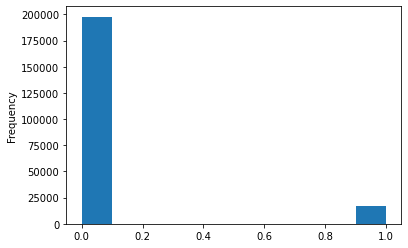

In [49]:
train['target'].astype('int').plot.hist()

In [50]:
#It is unbalaced classification because there are much more loans that were paid on time than not paid ones.

In [67]:
print('paid on time(0)', round(train['target'].value_counts(normalize = True)[0] * 100,2), '% of the dataset')
print('paid with difficulties(1)', round(train['target'].value_counts(normalize = True)[1] * 100,2), '% of the dataset')

X = train.drop('target', axis=1)
y = train['target']

# Splitting into develop and test sets
X_develop, X_test, y_develop, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

print('-' * 100)

print('Label Distributions: \n')
print('Develop:')
print('paid on time(0)', round(y_develop.value_counts(normalize = True)[0] * 100,2), '% of the dataset')
print('paid with difficulties(1)', round(y_develop.value_counts(normalize = True)[1] * 100,2), '% of the dataset')

print('Test:')
print('paid on time(0)', round(y_test.value_counts(normalize = True)[0] * 100,2), '% of the dataset')
print('paid with difficulties(1)', round(y_test.value_counts(normalize = True)[1] * 100,2), '% of the dataset')

paid on time(0) 91.89 % of the dataset
paid with difficulties(1) 8.11 % of the dataset
----------------------------------------------------------------------------------------------------
Label Distributions: 

Develop:
paid on time(0) 91.9 % of the dataset
paid with difficulties(1) 8.1 % of the dataset
Test:
paid on time(0) 91.89 % of the dataset
paid with difficulties(1) 8.11 % of the dataset


In [66]:
train['target'].value_counts(normalize = False)[1]

17448

In [51]:
#SMOTE strategy
# smote = SMOTE(sampling_strategy='minority', random_state=0)
# smox, smoy = smote.fit_resample(X_develop, y_develop)
# train = pd.concat([smox, smoy], axis = 1)

In [69]:
#Under sampling strategy
US = RandomUnderSampler(sampling_strategy='majority', random_state=0)
usx, usy = US.fit_resample(X, y)
train = pd.concat([usx, usy], axis = 1)


In [53]:
#over sampling strategy
# OS = RandomOverSampler(sampling_strategy='minority', random_state=0)
# osx, osy = OS.fit_resample(X, y)
# train = pd.concat([osx, osy], axis = 1)

In [54]:
train.shape

(34896, 49)

paid on time(0 50.0 % of the dataset
paid with difficulties(1) 50.0 % of the dataset


/Users/sultanbeishenkulov/Programming/anaconda/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


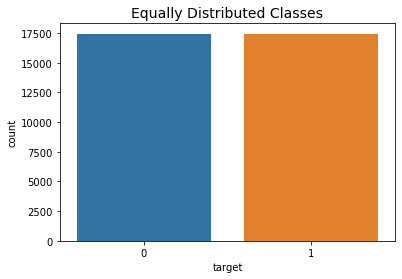

In [70]:
print('paid on time(0', round(train['target'].value_counts(normalize = True)[0] * 100,2), '% of the dataset')
print('paid with difficulties(1)', round(train['target'].value_counts(normalize = True)[1] * 100,2), '% of the dataset')


sns.countplot('target', data=train)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [71]:
correlations = train.corr()['target'].sort_values()

In [72]:
# Display correlations
print('list of correlations: (from worst to best)\n', correlations)

list of correlations: (from worst to best)
 ext_source_2                  -0.271326
ext_source_3                  -0.170409
ext_source_4                  -0.154307
days_employment               -0.086409
amt_goods_price               -0.076955
name_contract_type            -0.061151
amt_credit                    -0.058572
organization_type             -0.055228
flag_phone                    -0.051740
amt_income_total              -0.046562
flag_own_car                  -0.039306
hour_appr_process_start       -0.037970
amt_req_credit_bureau_mon     -0.030774
amt_annuity                   -0.029075
flag_own_realty               -0.011822
amt_req_credit_bureau_qrt     -0.009758
name_family_status            -0.005091
flag_email                    -0.003414
id                            -0.000990
amt_req_credit_bureau_week     0.001545
flag_cont_mobile               0.003225
amt_req_credit_bureau_hour     0.004403
live_region_not_work_region    0.009393
weekday_appr_process_start     0.011

In [58]:
#Let us observe the relations between target and some general variables:

In [74]:
train['days_age'].head()

0   -10285
1   -19412
2   -16785
3   -12748
4   -13244
Name: days_age, dtype: int64

In [59]:
# Find the correlation of the positive days since birth and target (days age variable has the best corr)
train['days_age'] = abs(train['days_age'])
train['days_age'].corr(train['target'])

-0.14281694889499036

In [60]:
#there is a negative relation between age and a target, meaning that older clients pay more on time

In [61]:
#let's at the histogram of the relation

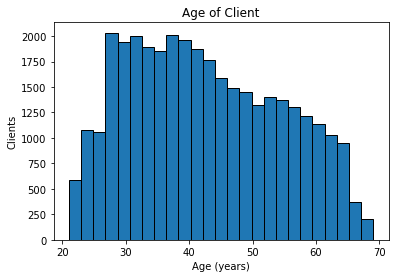

In [62]:
# Plot of the distribution (in years)
plt.hist(train['days_age'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Clients');

In [63]:
#let's see the plot showing the relation to the target variable

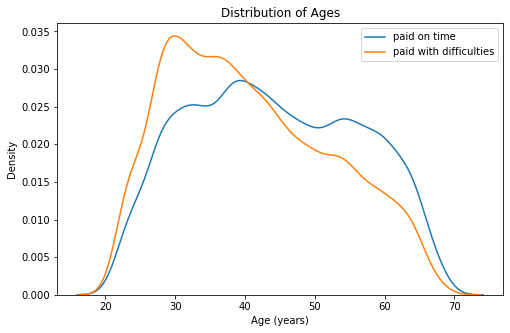

In [64]:
#Let us plot the distribution 
plt.figure(figsize = (8, 5))

# KDE plot of loans with customers that paid on time
sns.kdeplot(train.loc[train['target'] == 0, 'days_age'] / 365, label = 'paid on time')

# KDE plot of loans of customers that had difficulties with paying on time
sns.kdeplot(train.loc[train['target'] == 1, 'days_age'] / 365, label = 'paid with difficulties')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.legend()

In [65]:
#We can make a conclusion that young people (25-35 years old) statistically is the worst group in terms of paying

In [66]:
#Creating some new features (ratios), they might help to our prediction:

In [67]:
# train['credit_income_percent'] = train['amt_credit'] / train['amt_income_total']
# train['annuity_income_percent'] = train['amt_annuity'] / train['amt_income_total']
# train['credit_term'] = train['amt_annuity'] / train['amt_credit']
# train['days_employed_percent'] = train['days_employment'] / train['days_age']

# validation['credit_income_percent'] = validation['amt_credit'] / validation['amt_income_total']
# validation['annuity_income_percent'] = validation['amt_annuity'] / validation['amt_income_total']
# validation['credit_term'] = validation['amt_annuity'] / validation['amt_credit']
# validation['days_employed_percent'] = validation['days_employment'] / validation['days_age']

# Modelling

**Build a predictive model on develop set aimed to predict the fault risk:**


In [75]:
X_train = train.drop('target', axis=1).values
y_train = train['target'].values
# Splitting into develop and test sets
X_develop, X_test, y_develop, y_test = train_test_split(X_train, y_train, test_size=0.6, random_state=42)
#X_develop, X_test, y_develop, y_test

# **Logistic Regression**

In [77]:
# Make the logistic regression classifier
logreg = linear_model.LogisticRegression(random_state=42)
# Train on the training data
logreg.fit(X_develop, y_develop)

LogisticRegression(random_state=42)

In [135]:
th = 0.5
y_pred_logreg = logreg.predict_proba(X_test)[:,1]
y_actual_logreg = logreg.predict(X_test)
print("AUC:", round(roc_auc_score(y_test, y_pred_logreg),2))


AUC: 0.6


In [79]:
logreg.score(X_test, y_test)

0.5734549622695577

Apply the model to the validation set:

In [75]:
log_reg_validation = logreg.predict_proba(validation)[:,1]
log_reg_validation

array([0.59939775, 0.48113088, 0.60654411, ..., 0.61903098, 0.6997575 ,
       0.51282892])

# **Random Forest**

In [106]:
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 150, random_state = 50, verbose = 2, n_jobs = -1)
# Train on the training data
random_forest.fit(X_develop, y_develop)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.1s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150building tree 7 of 150

building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150building tree 13 of 150building tree 14 of 150


building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150building tree 21 of 150

building tree 22 of 150building tree 23 of 150

building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150building tree 31 of 150

building tree 32 of 150
building tree 33 of 150building tree 34 of 150building tree 35 of 150
building tree 36 of 150


building tree 37 of 150
building tree 38 of 150building tree 39 of 150

building tree 40 of 150
building tree 41 of 150building tree 42 of 150

b

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.7s finished


RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=50, verbose=2)

In [107]:
# Make predictions on the test data
y_pred_ranfor = random_forest.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.1s finished


In [108]:
print("AUC:", round(roc_auc_score(y_test, y_pred_ranfor),2))

AUC: 0.71


In [109]:
random_forest.score(X_test, y_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.1s finished


0.6519247301556977

Apply the model to the validation set:

In [131]:
ran_for_validation = random_forest.predict_proba(validation)[:, 1]
ran_for_validation

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.4s finished


array([0.30666667, 0.58      , 0.50666667, ..., 0.58666667, 0.54      ,
       0.70666667])

**Evaluation with confusion matrices**

In [114]:
def confusion_matrix_plot(y_test, y_preds, ax = False):
    
    cfm = confusion_matrix(y_test, y_preds)

    tn = cfm[0][0]
    tp = cfm[1][1]
    fn = cfm[1][0]
    fp = cfm[0][1]

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cfm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cfm.flatten()/np.sum(cfm)]
    labels = [v1+'\n'+v2+'\n'+v3 for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.set(font_scale=1.3)
    
    if ax:
        pass
    else:
        fig, ax = plt.subplots(figsize=(7,5)) 
    sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues', ax=ax)
    plt.tight_layout()
    ax.set_ylabel('True label', size=15)
    ax.set_xlabel('Predicted label', size=15)

Text(0.5, 1.0, 'Random Forest')

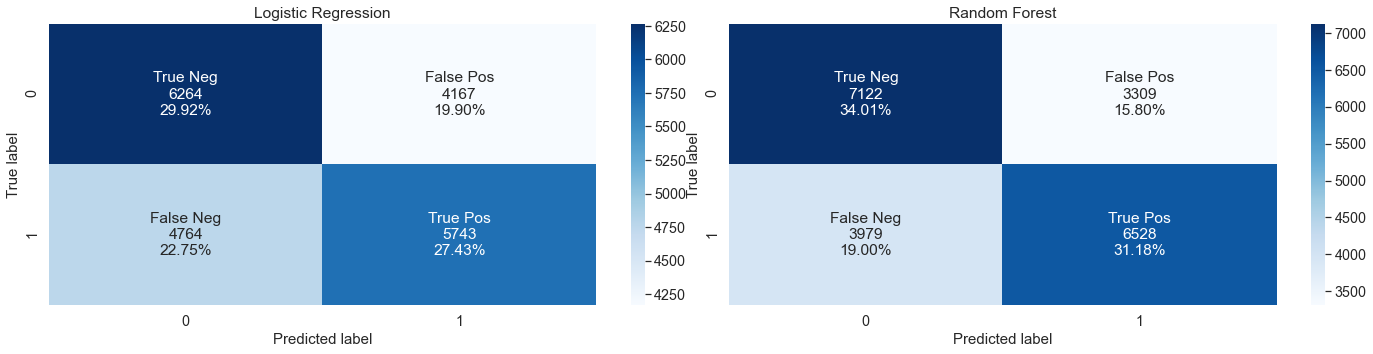

In [125]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
confusion_matrix_plot(y_test, y_pred_logreg>th, ax[0])
confusion_matrix_plot(y_test, y_pred_ranfor>th, ax[1])

ax[0].set_title("Logistic Regression")
ax[1].set_title("Random Forest")

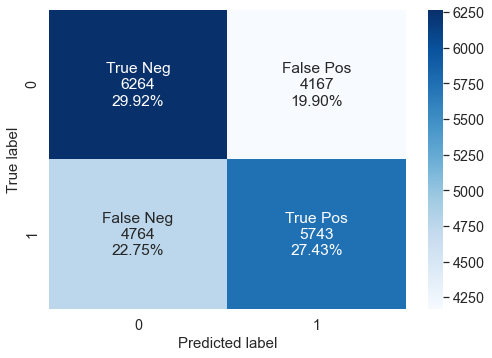

In [136]:
#confusion_matrix_plot(y_test, y_actual_logreg)

**AUC ROC**

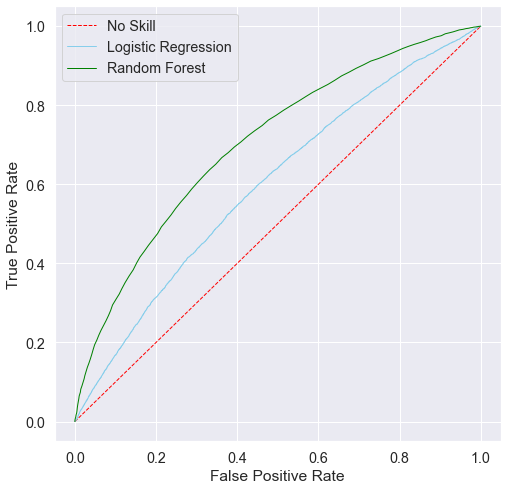

In [138]:
color_line = ['skyblue', 'green']

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color = 'red', linewidth = 1)

# plot the roc curve for the model
m_fpr, m_tpr, _ = roc_curve(y_test, y_pred_logreg)
plt.plot(m_fpr, m_tpr, label='Logistic Regression', color = color_line[0], linewidth = 1)      

# plot the roc curve for the model
m_fpr, m_tpr, _ = roc_curve(y_test, y_pred_ranfor)
plt.plot(m_fpr, m_tpr, label='Random Forest', color = color_line[1], linewidth = 1)      

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.rcParams["figure.figsize"] = (6,6)
plt.show()

**Saving the model:**

In [87]:
filename1 = 'random_forest_sultan.sav'
pickle.dump(random_forest, open(filename1, 'wb'))




In [90]:
loaded_model = pickle.load(open('random_forest_sultan.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.6467666443786417


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


**Comments:**

In [ ]:
#1.I changed the order of tasks a bit because I wanted to do some feature engineering and look at the correlations
#between the target and the features.
#2.At the moment I am going through the machine learning models and trying to look at each one and compare.
#3.I have some issues with understanding data and creating better features for the prediction.
#4.I am going to keep working on that exercise and check some feature engineering techniques as well as 
#other machine learning models in order to improve the model.